In [4]:
from spacy.lang.en.stop_words import STOP_WORDS
import spacy

In [3]:
len(STOP_WORDS),type(STOP_WORDS)

(326, set)

In [5]:
Pipeline=spacy.load("en_core_web_sm")

In [29]:
doc="Arham khan is a good boy and he loved to ate biryani and, loves to work on Artificial Intelligence."
tokenize_doc=Pipeline(doc)
sent_lm=[token.lemma_ for token in tokenize_doc if not token.is_punct] #Apply Lemmatization
sent_st=[token for token in sent_lm if not  token in STOP_WORDS] #Apply Stopwords



In [30]:
sent_st

['Arham',
 'khan',
 'good',
 'boy',
 'love',
 'ate',
 'biryani',
 'love',
 'work',
 'Artificial',
 'Intelligence']

In [43]:
Pipeline=spacy.load("en_core_web_sm")
def Preprocess(sent):
    tokenize_doc=Pipeline(sent)
    sent_lm=[token.lemma_ for token in tokenize_doc if not token.is_punct and not token.is_stop] #Apply Lemmatization
    return ' '.join(sent_lm) 
    

In [44]:
import pandas as pd
df=pd.read_csv("email.csv")

In [45]:
df['Preprocess_Message'] = df['Message'].apply(Preprocess)

In [46]:
df.head()

,Category,Message,Preprocess_Message
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah think go usf live


In [48]:
df['spam']=df['Category'].apply(lambda x : 0 if x == "ham" else 1)

In [49]:
df.head()

,Category,Message,Preprocess_Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win FA Cup final tkts 2...,1
3,ham,U dun say so early hor... U c already then say...,u dun early hor u c,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah think go usf live,0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sb
model=LogisticRegression()
import seaborn as sn
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
import re
import spacy
Pipeline=spacy.load("en_core_web_sm")
cv=CountVectorizer()
OhE=OneHotEncoder(handle_unknown="ignore")
LE=LabelEncoder()

In [50]:
X_train,X_test,y_train,y_test=train_test_split(df['Preprocess_Message'],df['spam'],test_size=0.2,random_state=42)

In [51]:
X_train_cv=cv.fit_transform(X_train.values)
X_train_cv=X_train_cv.toarray()
X_test_cv=cv.transform(X_test)
X_test_cv=X_test_cv.toarray()

In [52]:
import seaborn as sn
def Evaluator(model,X_train,Y_train,X_test,Y_test):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)
    pred=precision_score(Y_test,Y_pred)
    rec=recall_score(Y_test,Y_pred)
    f1=f1_score(Y_test,Y_pred)

    print(
          f"Accuracy : {accuracy}\nPrecision : {pred}\nRecall : {rec}\nF1-Score : {f1}" )
    print(classification_report(Y_test,Y_pred))
    cm=confusion_matrix(Y_test,Y_pred)
    plt.figure(figsize=(10,7))
    sn.heatmap(cm,annot=True)
    plt.show()

Accuracy : 0.9811659192825112
Precision : 1.0
Recall : 0.8662420382165605
F1-Score : 0.9283276450511946
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       958
           1       1.00      0.87      0.93       157

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



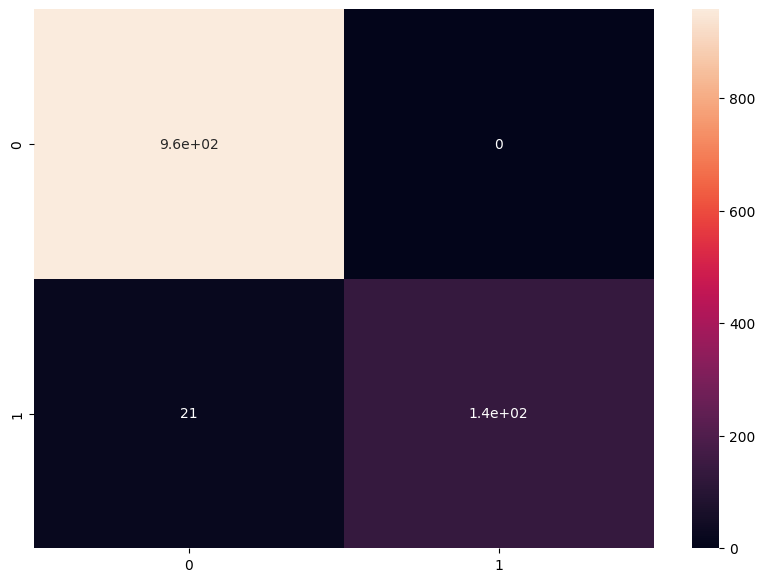

In [53]:
Evaluator(model,X_train_cv,y_train,X_test_cv,y_test)